In [8]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Step 1: Load Dataset
# ------------------------------
df = pd.read_csv("CONVENIENT_global_metadata.csv", encoding='latin1')
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (289, 4)
  Country/Region Province/State       Lat       Long
0    Afghanistan            NaN  33.93911  67.709953
1        Albania            NaN  41.15330  20.168300
2        Algeria            NaN  28.03390   1.659600
3        Andorra            NaN  42.50630   1.521800
4         Angola            NaN -11.20270  17.873900


In [16]:
# Fill numeric columns with 0 (common for cumulative COVID data)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



/tmp/ipython-input-3636119671.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [17]:
df = df.drop_duplicates()


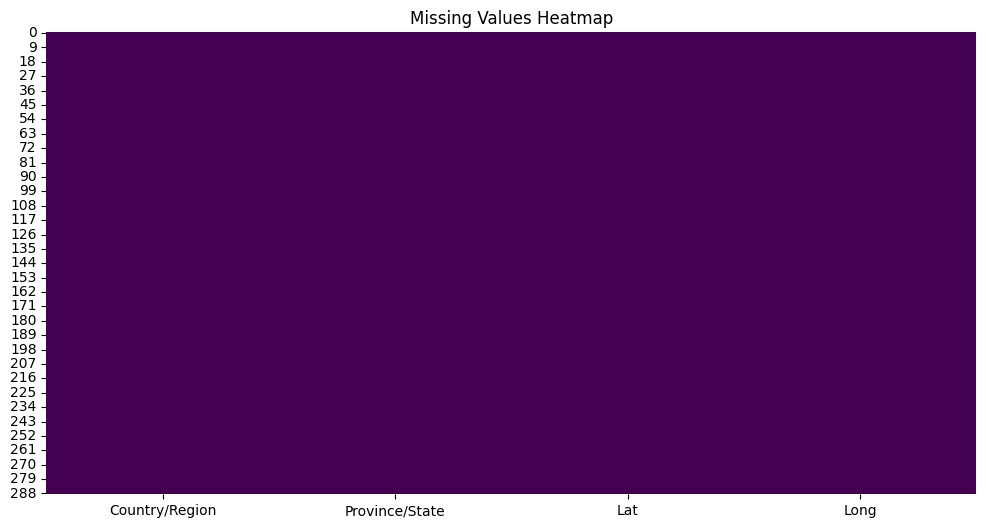

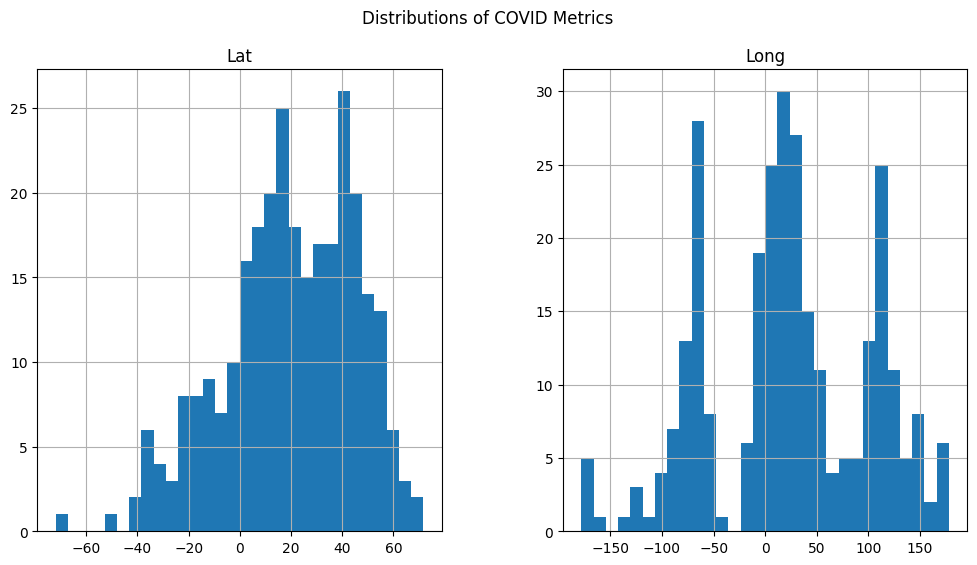

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Distribution of numeric columns
df[numeric_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Distributions of COVID Metrics")
plt.show()
